# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [3]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2, 3], [6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [6]:
d = tf.constant(['hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'hello'], shape=(1,), dtype=string)


### 난수 생성

In [7]:
rand = tf.random.uniform([1], 0, 1) # shape, 0부터 1
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.63747084], shape=(1,), dtype=float32)


In [8]:
rand2 = tf.random.normal([1,2], 0, 1) # 정규 분포 shape, 평균, 표준분포
print(rand2.shape)
rand2

(1, 2)


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.75078285, -0.10727599]], dtype=float32)>

In [9]:
rand3 = tf.random.normal(shape=(3, 2), mean=0, stddev=1)
print(rand3.shape)
rand3

(3, 2)


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.56635517, -1.0251769 ],
       [-0.91057456,  2.1770303 ],
       [-0.05042903, -1.1436932 ]], dtype=float32)>

### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [10]:
a = tf.constant(3)
b = tf.constant(2)

In [11]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [12]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [13]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [14]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [15]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [16]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(t.shape)
print(d.dtype)

(2, 3)
<dtype: 'string'>


In [17]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [18]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [19]:
t + 10 # element-wise sum

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [20]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [21]:
print(t @ tf.transpose(t)) # matmul
print(tf.matmul(t, tf.transpose(t)))

tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


In [22]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [23]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [24]:
# # error
# tf.constant(2.) + tf.constant(40)

In [25]:
# # error 비트가 안맞아도 불가능
# tf.constant(2.) + tf.constant(30., dtype=tf.float64)

In [26]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

# print(t + t2) # error
print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [27]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [28]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [29]:
def my_function_(x):
    return x**2 -10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [30]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [31]:
tf_my_func.python_function(2)

-13

In [32]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[2.], [3.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [33]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.], [3.]])
    b = tf.constant(4.)
    return inner_function(x, y, b)

outer_function(tf.constant([[1., 2.]])).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [34]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [35]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x
    
input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Egaer time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Egaer time: 3.567304300000001
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Graph time: 1.3699627999999997


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [36]:
X = tf.Variable(20.0)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [37]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [38]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [39]:
x2 = tf.Variable(4)
# 1회성 호출로 2번 수행하면 오류 발생
dy_dx = tape.gradient
dy_dx.numpy()

AttributeError: 'function' object has no attribute 'numpy'

In [40]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)
    
grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx: ', grad['x'])
print('dz/dy: ', grad['y'])

dz/dx:  tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy:  None


In [41]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [42]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [43]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [44]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [45]:
# 사용하지 않으면 오브젝트 제거
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [46]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
    z = x * W + bias
    return sigmoid(z)

In [47]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)
print(x.shape)
print(W.shape)

print(x)
print(W)

print(Neuron(x, W))

(1, 2)
(1, 2)
tf.Tensor([[-2.268358  -1.2224295]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.526992   1.3200369]], shape=(1, 2), dtype=float32)
[[0.76770663 0.16608219]]


In [48]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)
print(x.shape)
print(W.shape)
print(x)
print(W)

print(Neuron(x, W))

(2, 1)
(2, 1)
tf.Tensor(
[[-2.7313108 ]
 [ 0.87571377]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 1.3039658 ]
 [-0.40389958]], shape=(2, 1), dtype=float32)
[[0.02761116]
 [0.4124854 ]]


In [49]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2, 1), 0, 1)
print(x.shape)
print(W.shape)
print(x)
print(W)

print(Neuron(x, W))

(1,)
(2, 1)
tf.Tensor([-3.0422661], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.3837026]
 [-1.1072713]], shape=(2, 1), dtype=float32)
[[0.7626613 ]
 [0.96670914]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [50]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y: ', y)

[0.5671528]
y:  0


In [51]:
for i in range(1000):
    output = Neuron(x,W)
    error  = y - output
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.10690581]	[0.10690581]
200	[-0.05364488]	[0.05364488]
300	[-0.03542595]	[0.03542595]
400	[-0.026359]	[0.026359]
500	[-0.02095803]	[0.02095803]
600	[-0.01738132]	[0.01738132]
700	[-0.01484113]	[0.01484113]
800	[-0.01294524]	[0.01294524]
900	[-0.01147677]	[0.01147677]
1000	[-0.01030618]	[0.01030618]


In [52]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)

In [53]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print('y: ', y)

[[0.64375246]]
y:  tf.Tensor([1.], shape=(1,), dtype=float32)


In [54]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.10964292]]	[[0.8903571]]
200	[[0.06114441]]	[[0.9388556]]
300	[[0.0419789]]	[[0.9580211]]
400	[[0.03185314]]	[[0.96814686]]
500	[[0.02562338]]	[[0.9743766]]
600	[[0.02141404]]	[[0.97858596]]
700	[[0.01838338]]	[[0.9816166]]
800	[[0.01609915]]	[[0.98390085]]
900	[[0.0143165]]	[[0.9856835]]
1000	[[0.01288742]]	[[0.9871126]]


In [55]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1,))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[1.7537674 0.3811039 0.8211631]]
weights	: [[-0.8214325  1.4013107 -1.0505896]]
bias	: [[0.]]


In [56]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + x * 0.1 * error
    bias = bias + 1 * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02222949]]	[[0.9777705]]
200	[[0.01070946]]	[[0.98929054]]
300	[[0.00704193]]	[[0.99295807]]
400	[[0.00524282]]	[[0.9947572]]
500	[[0.00417507]]	[[0.99582493]]
600	[[0.00346822]]	[[0.9965318]]
700	[[0.00296593]]	[[0.9970341]]
800	[[0.0025906]]	[[0.9974094]]
900	[[0.00229949]]	[[0.9977005]]
1000	[[0.00206721]]	[[0.9979328]]


In [57]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[1.7537674 0.3811039 0.8211631]]
weights	: [[2.0266411  2.0202138  0.28295863]]
bias	: [[1.6239749]]


### AND Gate

In [58]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))
        
print('\n가중치\t: {}'.format(W))
print('\n편향\t: {}'.format(b))

Epoch    0	Error Sum [-1.1978939]
Epoch  200	Error Sum [-0.10493016]
Epoch  400	Error Sum [-0.0637671]
Epoch  600	Error Sum [-0.04567647]
Epoch  800	Error Sum [-0.03548282]
Epoch 1000	Error Sum [-0.0289565]
Epoch 1200	Error Sum [-0.02443084]
Epoch 1400	Error Sum [-0.02111386]
Epoch 1600	Error Sum [-0.01857954]
Epoch 1800	Error Sum [-0.01658275]

가중치	: [6.987501  6.9906197]

편향	: [-11.660241]


In [59]:
# 예측
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.9103471]
X: [1 0] Y: [0] Output: [0.00926007]
X: [0 1] Y: [0] Output: [0.00928873]
X: [0 0] Y: [0] Output: [8.630141e-06]


### OR Gate

In [60]:
X2 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 * error
        b2 = b2 + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))
        
print('\n가중치\t: {}'.format(W2))
print('\n편향\t: {}'.format(b2))

Epoch    0	Error Sum [1.6471455]
Epoch  200	Error Sum [-0.0547393]
Epoch  400	Error Sum [-0.02728301]
Epoch  600	Error Sum [-0.01803681]
Epoch  800	Error Sum [-0.01341962]
Epoch 1000	Error Sum [-0.01066319]
Epoch 1200	Error Sum [-0.00883625]
Epoch 1400	Error Sum [-0.00753901]
Epoch 1600	Error Sum [-0.00657053]
Epoch 1800	Error Sum [-0.00582132]

가중치	: [8.186175 8.18432 ]

편향	: [-4.6269875]


In [61]:
# 예측
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X: [1 1] Y: [1] Output: [0.999992]
X: [1 0] Y: [1] Output: [0.97232574]
X: [0 1] Y: [1] Output: [0.9722758]
X: [0 0] Y: [0] Output: [0.00968939]


### XOR Gate

In [62]:
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))
        
print('\n가중치\t: {}'.format(W3))
print('\n편향\t: {}'.format(b3))

Epoch    0	Error Sum [0.7441446]
Epoch  200	Error Sum [-0.000875]
Epoch  400	Error Sum [-3.5583973e-05]
Epoch  600	Error Sum [-1.66893e-06]
Epoch  800	Error Sum [-1.013279e-06]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279642e-02 -2.0600855e-06]

편향	: [-0.999997]


In [63]:
# 예측 - 잘 안된 경우: 단일 퍼셉트론으로는 XOR연산 불가능
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.27914283]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2,)),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(X4, Y4, epochs=4000, batch_size=1, verbose=0)

In [66]:
model.predict(X4)

array([[0.10620909],
       [0.9130904 ],
       [0.91303456],
       [0.09399597]], dtype=float32)

## 시각화 사용

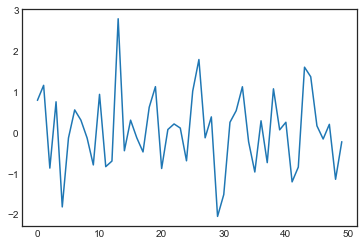

In [67]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0 , 1)
plt.plot(x, y)
plt.show()

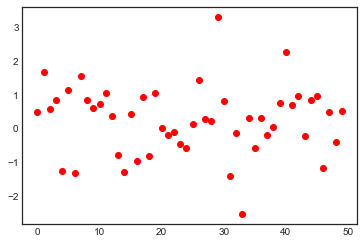

In [68]:
x = range(50)
y = tf.random.normal([50], 0 , 1)
plt.plot(x, y, 'ro')
plt.show()

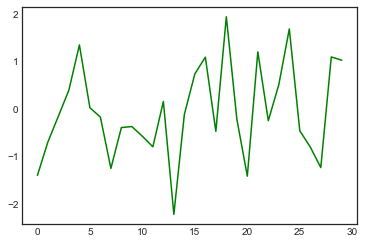

In [69]:
x = range(30)
y = tf.random.normal([30], 0 , 1)
plt.plot(x, y, 'g-')
plt.show()

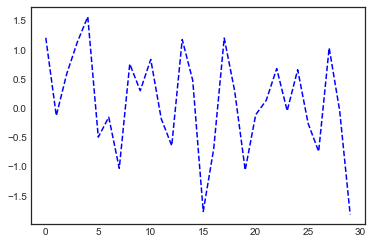

In [70]:
x = range(30)
y = tf.random.normal([30], 0 , 1)
plt.plot(x, y, 'b--')
plt.show()

### XOR Gate의 'LOSS' 시각화


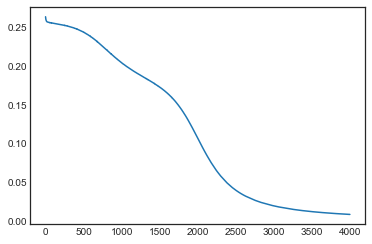

In [74]:
plt.plot(history.history['loss'])